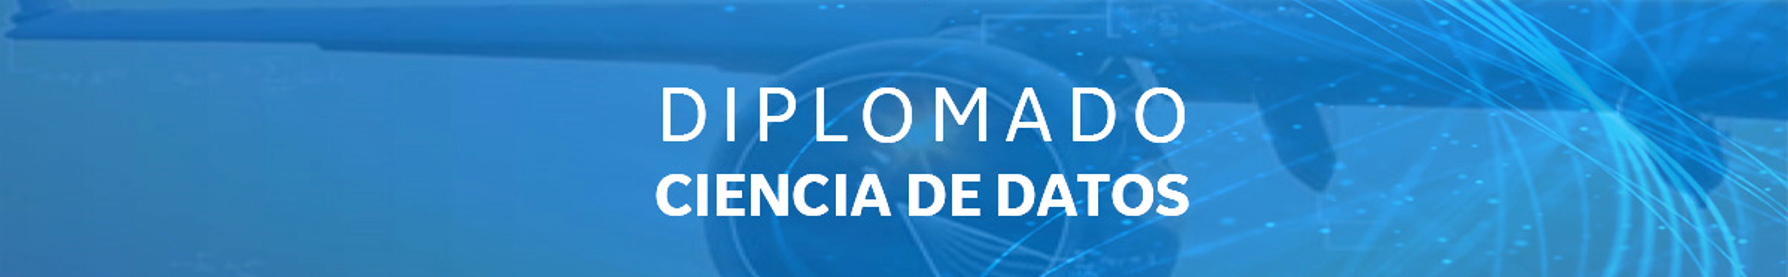

# Tipos de Aprendizaje

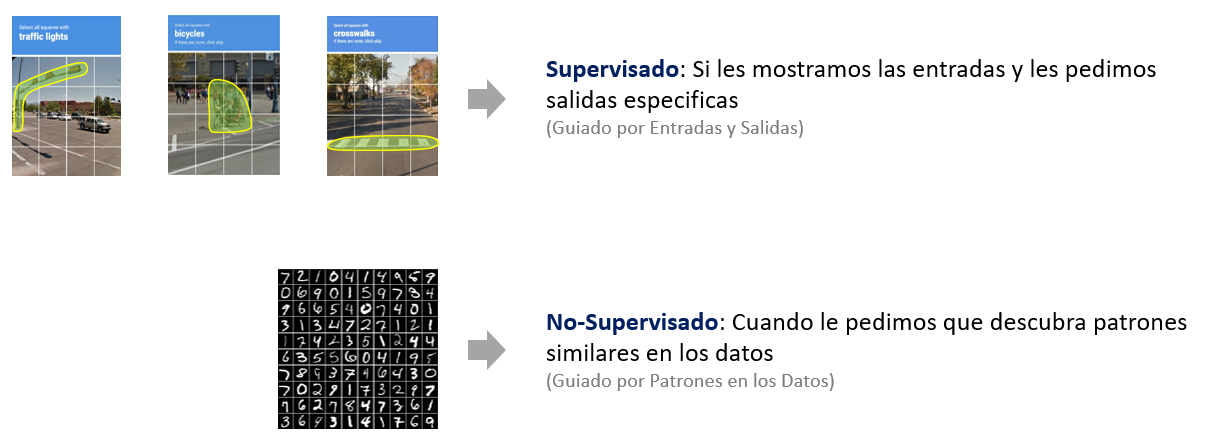

<br><br><br>

Recordemos que las técnicas de modelando matemático se usan para __inferir tres tipos de fenómenos__

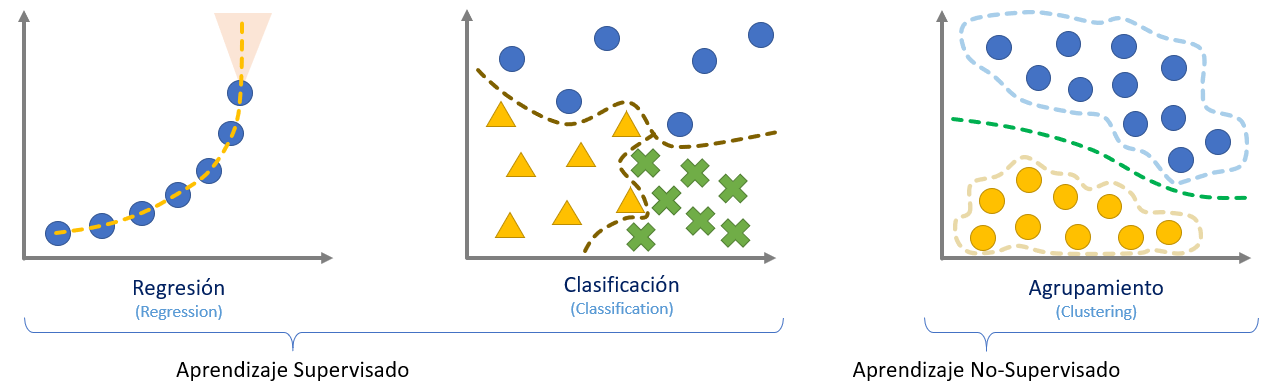

In [1]:
# Cargar Librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Laboratorio

Usemos tres conjuntos de datos para comparar varias técnicas de modelado, por ahora solo concentrémonos en ejecutar muchos algoritmos, tal como hacen algunos _frameworks_ de [_AutoML_](https://docs.microsoft.com/es-es/azure/machine-learning/concept-automated-ml)

## Regresión

* Dataset: Sacramento Housing
* Variable Objetivo: `price`

In [2]:
df_regresion = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Sacramento.csv')

df_regresion.head(4).T

,0,1,2,3
city,SACRAMENTO,SACRAMENTO,SACRAMENTO,SACRAMENTO
zip,z95838,z95823,z95815,z95815
beds,2,3,2,2
baths,1.0,1.0,1.0,1.0
sqft,836,1167,796,852
type,Residential,Residential,Residential,Residential
price,59222,68212,68880,69307
latitude,38.631913,38.478902,38.618305,38.616835
longitude,-121.434879,-121.431028,-121.443839,-121.439146


In [3]:
# Preparemos Xs y y
X = df_regresion[ ['beds', 'baths', 'sqft', 'latitude', 'longitude'] ].values
y = df_regresion['price'].values

# Reservamos el 20% de los datos para evaluar los modelos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Preparemos varios modelos de Regresion
from sklearn import linear_model as L

modelos = [
    ('LinearRegression', L.LinearRegression()),
    ('BayesianRidge', L.BayesianRidge()),
    ('Lasso', L.Lasso(alpha=0.1))
]

# Entrenar Modelos
for m in modelos:
    m[1].fit(X_train, y_train)

# Evaluar Modelos (Cero es mejor)
from sklearn.metrics import mean_absolute_percentage_error

for m in modelos:
    y_pred = m[1].predict( X_test )
    print(m[0], mean_absolute_percentage_error(y_test, y_pred))

LinearRegression 0.32826466180691233
BayesianRidge 0.3365773473464847
Lasso 0.32826460138389707


## Clasificación

* Dataset: Spam (Texto Codificado con TF-IDF)
* Variable Objetivo: `type` (1: Es Spam, 0: No-Spam)

In [4]:
df_clasificacion = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/spam.csv')
df_clasificacion.head(4).T

,0,1,2,3
make,0.000,0.210,0.060,0.000
address,0.640,0.280,0.000,0.000
all,0.640,0.500,0.710,0.000
num3d,0.000,0.000,0.000,0.000
our,0.320,0.140,1.230,0.630
over,0.000,0.280,0.190,0.000
remove,0.000,0.210,0.190,0.310
internet,0.000,0.070,0.120,0.630
order,0.000,0.000,0.640,0.310
mail,0.000,0.940,0.250,0.630


In [5]:
# Preparemos Xs y y
X = df_clasificacion.drop('type', axis=1).values
y = df_clasificacion['type'].values

# Reservamos el 20% de los datos para evaluar los modelos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Preparemos varios modelos de Clasificacion
from sklearn.linear_model import LogisticRegression # ¿Porque usamos una Regresion?
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

modelos = [
    ('LogisticRegression', LogisticRegression()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC())
]

# Entrenar Modelos
for m in modelos:
    m[1].fit(X_train, y_train)

# Evaluar Modelos (Uno es mejor)
from sklearn.metrics import accuracy_score

for m in modelos:
    y_pred = m[1].predict( X_test )
    print(m[0], accuracy_score(y_test, y_pred))

LogisticRegression 0.9370249728555917
DecisionTree 0.9283387622149837
Naive Bayes 0.8284473398479913
SVM 0.7090119435396308


## Agrupamiento

* Dataset: Seeds
* Nota: Borraremos la variable objetivo `V8` (¿Porque estamos borrando esta variable?)

In [6]:
df_agrupamiento = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/seeds.csv')
df_agrupamiento.drop('V8', axis=1, inplace=True)

df_agrupamiento.head(4).T

,0,1,2,3
V1,15.260,14.8800,14.290,13.8400
V2,14.840,14.5700,14.090,13.9400
V3,0.871,0.8811,0.905,0.8955
V4,5.763,5.5540,5.291,5.3240
V5,3.312,3.3330,3.337,3.3790
V6,2.221,1.0180,2.699,2.2590
V7,5.220,4.9560,4.825,4.8050


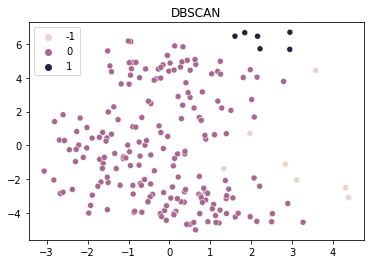

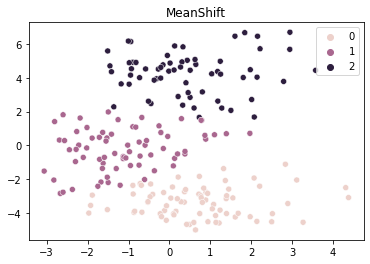

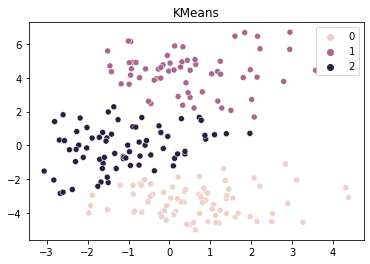

In [7]:
# Preparando X
X = df_agrupamiento.values

# Preparemos varios modelos de Agrupamiento
from sklearn import cluster as C

modelos = [
    ('DBSCAN', C.DBSCAN(eps=0.95, min_samples=3)),
    ('MeanShift', C.MeanShift(bandwidth=2)),
    ('KMeans', C.KMeans(n_clusters=3))
]

# Entrenar Modelos
for m in modelos:
    m[1].fit(X)

# Ver resultados del Agrupamiento
# (Usemos un PCA de 2 dimenciones para proyectar las poblaciones a una grafica 2D)
from sklearn.decomposition import PCA
X_2d = PCA(2).fit_transform(X)

for m in modelos:    
    sns.scatterplot(
        data=None,
        y=X_2d.T[0],
        x=X_2d.T[1],
        hue=m[1].labels_
    )
    plt.title( m[0] )
    plt.show()

## Preguntas para reflexionar

* ¿Por qué las métricas de evaluación cambian de criterio entre _regresión_ y _clasificación_?
* ¿Por qué no hay métricas de evaluación para _agrupamiento_?
* ¿Estamos haciendo ciencia de datos al entrenar estos modelos?